In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os, sys
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import utils
from pathlib import Path
import mplhep

sys.path.append("../../../analysisTools/")
import plotTools as ptools

# Plot 1D

In [2]:
prefix = './coffea/skimmed/'
suffix = '_SR_BDTv5'

In [3]:
# Signal
sig_histo = util.load(f'{prefix}/signal{suffix}_TrueVertex.coffea')[0]

In [4]:
# Background
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}{suffix}_BestVertex.coffea')[0]

In [5]:
utils.get_signal_point_dict(sig_histo).sort_values(by=['m1'])

,mchi,dmchi,ctau,m1,m2,delta,name
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.50,1.0,1.0,5.0,6.0,0.2,sig_2018_Mchi-5p5_dMchi-1p0_ctau-1
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.50,1.0,10.0,5.0,6.0,0.2,sig_2018_Mchi-5p5_dMchi-1p0_ctau-10
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.25,0.5,10.0,5.0,5.5,0.1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-10
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.25,0.5,1.0,5.0,5.5,0.1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-1
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.25,0.5,100.0,5.0,5.5,0.1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-100
...,...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,110.00,20.0,100.0,100.0,120.0,0.2,sig_2018_Mchi-110p0_dMchi-20p0_ctau-100
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,105.00,10.0,1.0,100.0,110.0,0.1,sig_2018_Mchi-105p0_dMchi-10p0_ctau-1
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,105.00,10.0,100.0,100.0,110.0,0.1,sig_2018_Mchi-105p0_dMchi-10p0_ctau-100
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,110.00,20.0,1.0,100.0,120.0,0.2,sig_2018_Mchi-110p0_dMchi-20p0_ctau-1


In [6]:
utils.get_signal_list_of_cuts(sig_histo)

['Preselections',
 '0 < n(jet) < 3 & n(good vertex) > 0',
 'computing BDT score',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'BDT']

In [7]:
utils.get_signal_list_of_histograms(sig_histo)

['bdt_score',
 'abs1overEm1overP',
 'sel_vtx_vxy',
 'sel_vtx_vxy_projected',
 'sel_vtx_minDxy',
 'sel_vtx_dxy1',
 'sel_vtx_dxy2',
 'sel_vtx_minDz',
 'sel_vtx_deltaDxy',
 'sel_vtx_deltaDz',
 'sel_vtx_vxySignif',
 'sel_vtx_type',
 'sel_vtx_matchType',
 'sel_vtx_dR_zoom',
 'sel_vtx_chi2',
 'sel_vtx_dR',
 'sel_vtx_dEta',
 'sel_vtx_dPhi',
 'sel_vtx_sign_eta',
 'sel_vtx_prod_eta',
 'sel_vtx_METdPhi',
 'sel_vtx_pt',
 'sel_vtx_eta',
 'sel_vtx_phi',
 'sel_vtx_mass',
 'nLpt_Electron',
 'nPF_Electron',
 'nElectron',
 'nGoodVtx',
 'sel_vtx_pt_e1_over_pt_e2',
 'delta_dxy_over_mindxy',
 'delta_dxy_over_maxdxy',
 'delta_dxy_over_meandxy',
 'sel_vtx_pt_over_m',
 'met_over_lead_jet_pt',
 'sel_vtx_dEta_over_dPhi',
 'sel_vtx_log_dEta_over_dPhi',
 'ctau',
 'cos_collinear',
 'projectedLxy',
 'gen_cos_collinear',
 'abs_cos_collinear',
 'gen_ee_pt',
 'gen_chi2_pt',
 'gen_chi2_ee_pt_ratio',
 'ctau_vs_Lxy',
 'gen_chi2_pt_vs_gen_ee_pt',
 'sel_vtx_vxy_vs_mindxy',
 'dxy1_vs_dxy2',
 'sel_vtx_vxy_vs_matchType',
 's

In [8]:
utils.get_bkg_cutflow_df(bkg_histos, 'cutflow_nevts')

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",BDT
QCD,12311,381,381,160,159,159,158,3,0
Top,49818,4688,4688,3058,2348,2337,2336,2006,3
DY,205,14,14,12,12,12,12,10,0
Diboson,18067,1234,1234,915,860,852,848,767,2
Triboson,2257,170,170,116,106,105,104,92,0
W+jets,697657,48425,48425,37015,35472,35415,35377,29090,47
Z+jets,1281459,67427,67427,52627,50986,50934,50903,44480,18
Total,2061774,122339,122339,93903,89943,89814,89738,76448,70


### minDxy

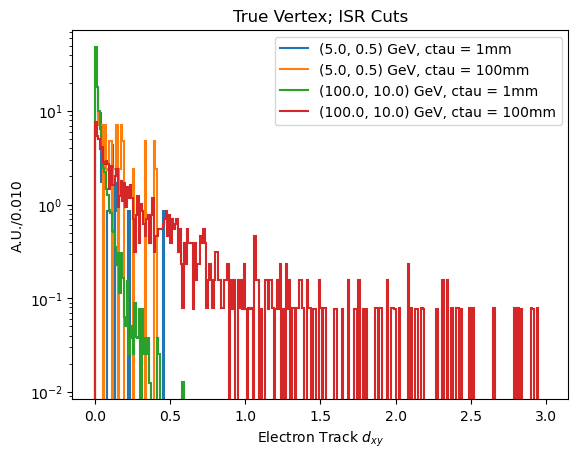

In [9]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 10j,
    'xlim': [0,3],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Vertex; ISR Cuts')
plt.legend()
plt.show()

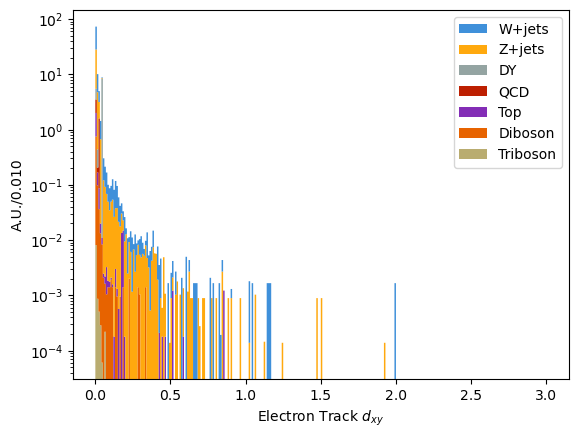

In [10]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### minDxy -- zoomed

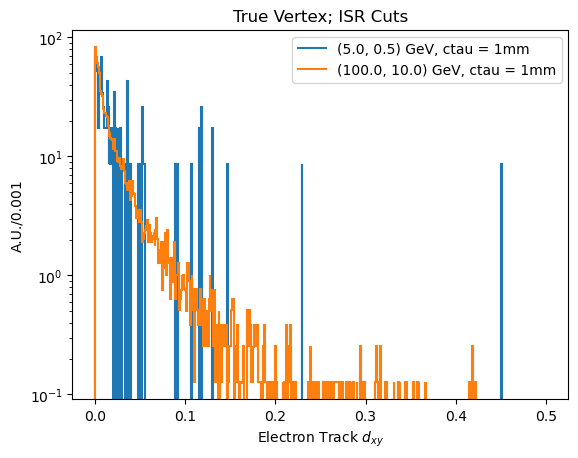

In [11]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Vertex; ISR Cuts')
plt.legend()
plt.show()

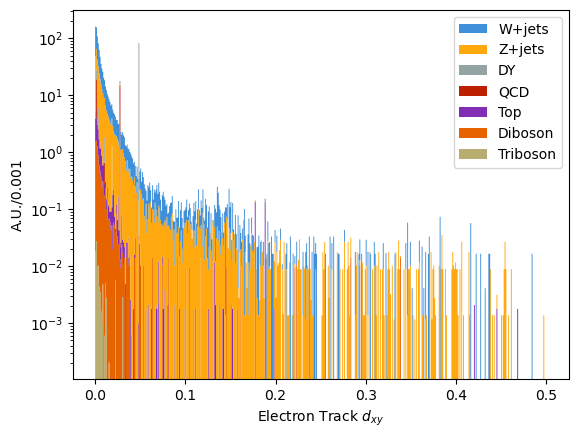

In [12]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### S/sqrt(B) scan for BDT WPs

In [13]:
sig_samples = list(sig_histo['cutflow'].keys())

In [14]:
histograms = []

for b in bkg_histos.keys():
    histograms = list(bkg_histos[b].keys())
    

In [15]:
bkg = {}

for h in histograms:
    bkg[h] = {}
    for b in bkg_histos.keys():
        if type(bkg_histos[b][h]) == hist.Hist and bkg_histos[b][h].sum(flow=True).value > 0:
            bkg[h][b] = bkg_histos[b][h][{"samp":sum}]

In [16]:
def longSignif(s, b):
    term1 = (s+b) * np.log(((s+b) * (b+np.sqrt(b)**2))/(b**2 + (s+b)*np.sqrt(b)**2))
    term2 = (b**2 / np.sqrt(b)**2) * np.log(1+ ((np.sqrt(b)**2)*s)/(b*(b+np.sqrt(b)**2)))

    return np.sqrt(2*(term1 - term2))

In [17]:
# Access all the sub-samples of the sample (or process) 'DY' at certain cut
s_over_b = {}
long_signif = {}
s = {}
tpr = {}

cut = 'cut9'

hname = 'sel_vtx_minDxy'
rebin = 1j

thres = []

for idx_sig, point in enumerate(sig_samples):
    #point = 'sig_2018_Mchi-5p5_dMchi-1p0_ctau-10'
    #print(point)
    # sig
    sig_hist = sig_histo[hname][{"samp":point,"cut":cut}][::rebin]
    
    bins = sig_hist.axes[0].edges[1:]
    
    s[point] = []
    tpr[point] = []
    long_signif[point] = []
    
    for idx, bin_edge in enumerate(bins):
        if idx == 0:
            continue
        else:
            if idx_sig == 0:
                thres.append(sig_hist[0:idx].axes.edges[0][-1])
            nFail = sig_hist[0:idx].sum().value
            nTotal = sig_hist.sum(flow=None).value
            nPass = nTotal - nFail
            
            s[point].append(nPass) # apply cut of: var > cutvalue
            tpr[point].append(nPass/nTotal)
    
    # bkg
    for b in bkg_histos.keys():
        entries = {b: bkg[hname][b].sum().value for b in bkg_histos.keys()}
        
    sorted_entries = dict(sorted(entries.items(), key=lambda x:x[1], reverse = True))
    
    bkg_stack = {b:bkg[hname][b] for b in sorted_entries.keys()}
    avail_cuts = {b:[bkg_stack[b].axes[0].bin(i) for i in range(len(bkg_stack[b].axes[0].widths))] for b in bkg_stack.keys()}
    bkg_stack = {b:bkg_stack[b][cut,::rebin] for b in bkg_stack.keys() if cut in avail_cuts[b]}
    
    bkgs = [bkg_stack[process] for process in bkg_stack.keys()]
    bkg_total = sum(bkgs)
    
    b = []
    fpr = []
    for idx, bin_edge in enumerate(bins):
        if idx == 0:
            continue
        else:
            nFail = bkg_total[0:idx].sum().value
            nTotal = bkg_total.sum(flow=None).value
            nPass = nTotal - nFail
            
            b.append(nPass) # apply cut of: var > cutvalue
            fpr.append(nPass/nTotal)
                
    # s/sqrt(b)
    s[point] = np.array(s[point])
    b = np.array(b)
    fpr = np.array(fpr)
    
    s_over_b[point] = list(s[point]/np.sqrt(b))
    long_signif[point] = list(longSignif(s[point], b))

/tmp/ipykernel_14976/4072727813.py:70: RuntimeWarning: divide by zero encountered in divide
  s_over_b[point] = list(s[point]/np.sqrt(b))
/tmp/ipykernel_14976/4072727813.py:70: RuntimeWarning: invalid value encountered in divide
  s_over_b[point] = list(s[point]/np.sqrt(b))
/tmp/ipykernel_14976/2063772337.py:2: RuntimeWarning: invalid value encountered in divide
  term1 = (s+b) * np.log(((s+b) * (b+np.sqrt(b)**2))/(b**2 + (s+b)*np.sqrt(b)**2))
/tmp/ipykernel_14976/2063772337.py:3: RuntimeWarning: invalid value encountered in divide
  term2 = (b**2 / np.sqrt(b)**2) * np.log(1+ ((np.sqrt(b)**2)*s)/(b*(b+np.sqrt(b)**2)))
/tmp/ipykernel_14976/2063772337.py:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*(term1 - term2))


In [18]:
from matplotlib.lines import Line2D

In [19]:
si = utils.get_signal_point_dict(sig_histo)

In [20]:
m1s = [5, 10, 20, 30, 40, 50, 70, 90, 100]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    #fig,axes = plt.subplots(1,3,figsize=(18,4))
    print(m1, delta, ctau)
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            sig_point = si[ (si.m1 == m1) & (si.delta == delta) & (si.ctau == ctau) ].name[0]

100 0.1 1
100 0.2 100


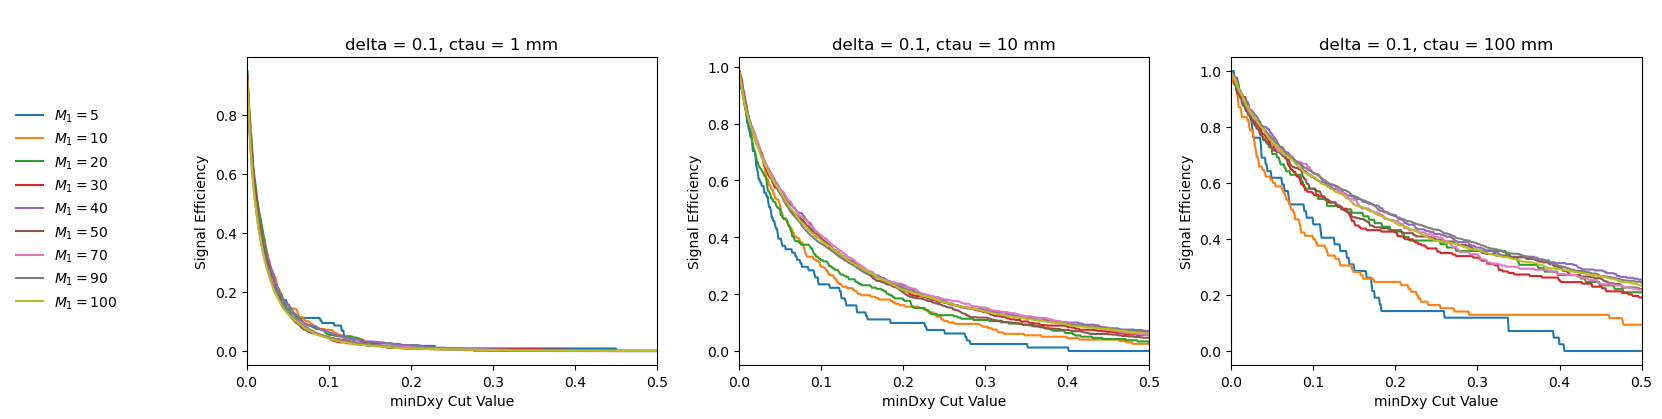

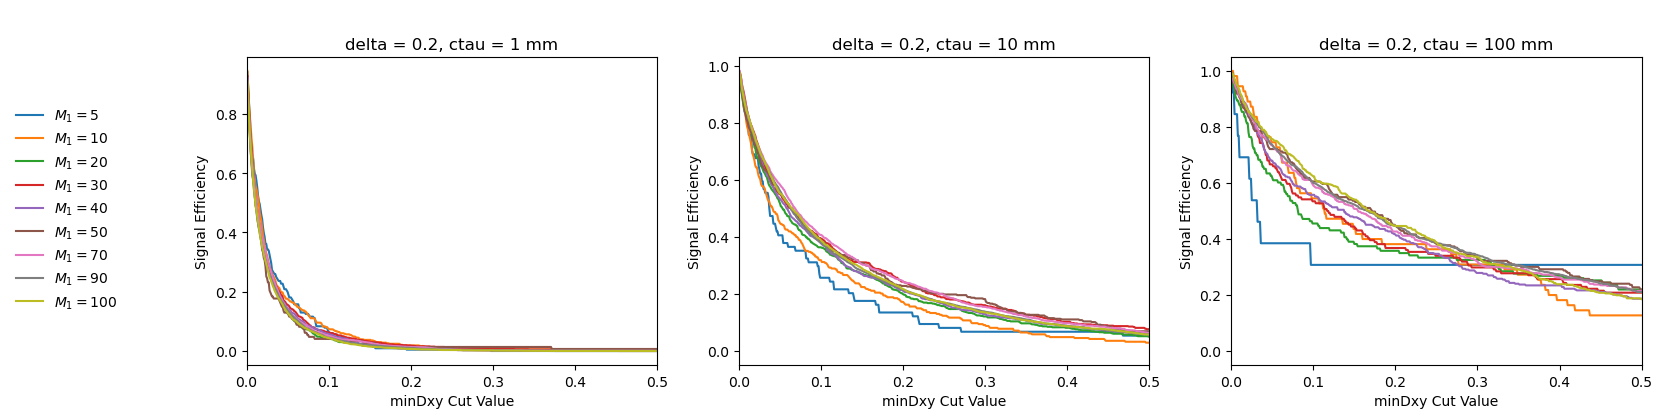

In [21]:
m1s = [5, 10, 20, 30, 40, 50, 70, 90, 100]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            sig_point = si[ (si.m1 == m1) & (si.delta == delta) & (si.ctau == ctau) ].name[0]
            axes[idx].plot(thres, tpr[sig_point], label=f'm1 = {m1} GeV')
    
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('minDxy Cut Value')
        axes[idx].set_ylabel('Signal Efficiency')
    
        #axes[idx].set_yscale('log')

        axes[idx].set_xlim([0, 0.5])
    
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)

In [22]:
'''
m1s = [5, 10, 20, 30, 40, 50, 70, 90, 100]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            sig_point = si[ (si.m1 == m1) & (si.delta == delta) & (si.ctau == ctau) ].name[0]
            axes[idx].plot(tpr[sig_point], long_signif[sig_point], label=f'm1 = {m1} GeV')
    
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('Signal Efficiency')
        axes[idx].set_ylabel('Significance')
    
        axes[idx].set_yscale('log')

        axes[idx].set_xlim([0.78,0.99])
    
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)
'''

'\nm1s = [5, 10, 20, 30, 40, 50, 70, 90, 100]\nctaus = [1, 10, 100]\ndeltas = [0.1, 0.2]\n\nfor delta in deltas:\n    fig,axes = plt.subplots(1,3,figsize=(18,4))\n    \n    for idx, ctau in enumerate(ctaus):\n        for m1 in m1s:\n            sig_point = si[ (si.m1 == m1) & (si.delta == delta) & (si.ctau == ctau) ].name[0]\n            axes[idx].plot(tpr[sig_point], long_signif[sig_point], label=f\'m1 = {m1} GeV\')\n    \n        axes[idx].set_title(f\'delta = {delta}, ctau = {ctau} mm\')\n        axes[idx].set_xlabel(\'Signal Efficiency\')\n        axes[idx].set_ylabel(\'Significance\')\n    \n        axes[idx].set_yscale(\'log\')\n\n        axes[idx].set_xlim([0.78,0.99])\n    \n    \n    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}\n    lines = [Line2D([0], [0], label=f"$M_1 = {m}$", color=massColors[m]) for m in sorted(list(massColors.keys()))]\n    \n    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed\n    legend_ax.axis(\'off\')\n    legend_ax

(0.0, 0.5)

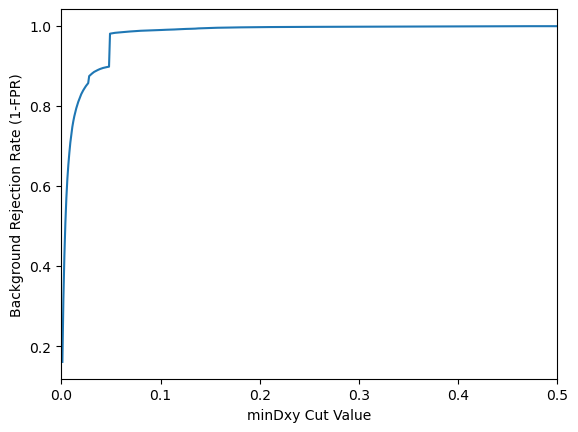

In [23]:
fig, ax = plt.subplots()
    
ax.plot(thres, 1-fpr)
  
ax.set_xlabel('minDxy Cut Value')
ax.set_ylabel('Background Rejection Rate (1-FPR)')
    
#ax.set_yscale('log')

ax.set_xlim([0, 0.5])

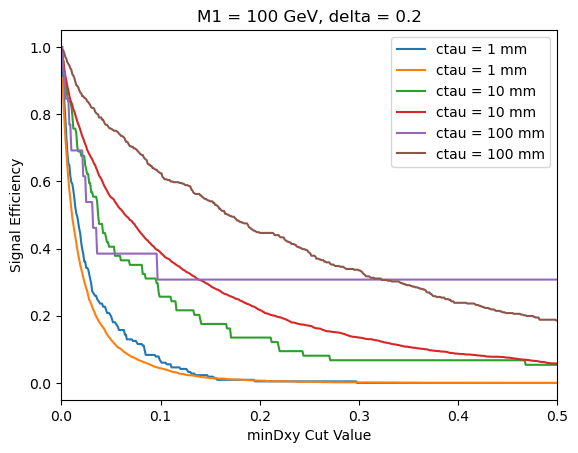

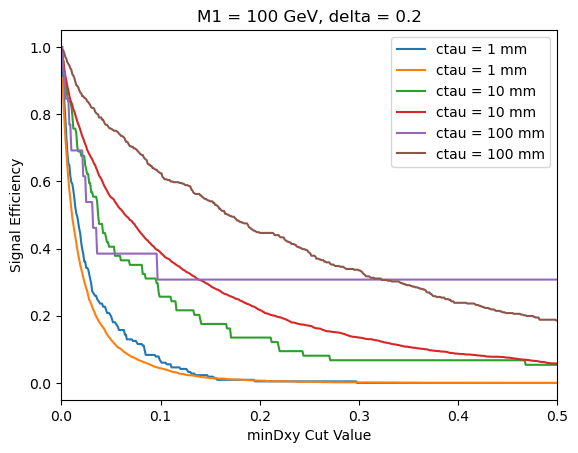

In [24]:
m1s = [5, 100]
#m1s = [5, 10, 20, 30, 40, 50, 70, 90, 100]
ctaus = [1, 10, 100]
deltas = [0.2]

for m1 in m1s:
    for delta in deltas:
        fig, ax = plt.subplots()
        
        for idx, ctau in enumerate(ctaus):
            for m1 in m1s:
                sig_point = si[ (si.m1 == m1) & (si.delta == delta) & (si.ctau == ctau) ].name[0]
                ax.plot(thres, tpr[sig_point], label=f'ctau = {ctau} mm')
      
        ax.set_xlabel('minDxy Cut Value')
        ax.set_ylabel('Signal Efficiency')

        ax.set_xlim([0, 0.5])
        
        plt.title(f"M1 = {m1} GeV, delta = {delta}")
        plt.legend()
        

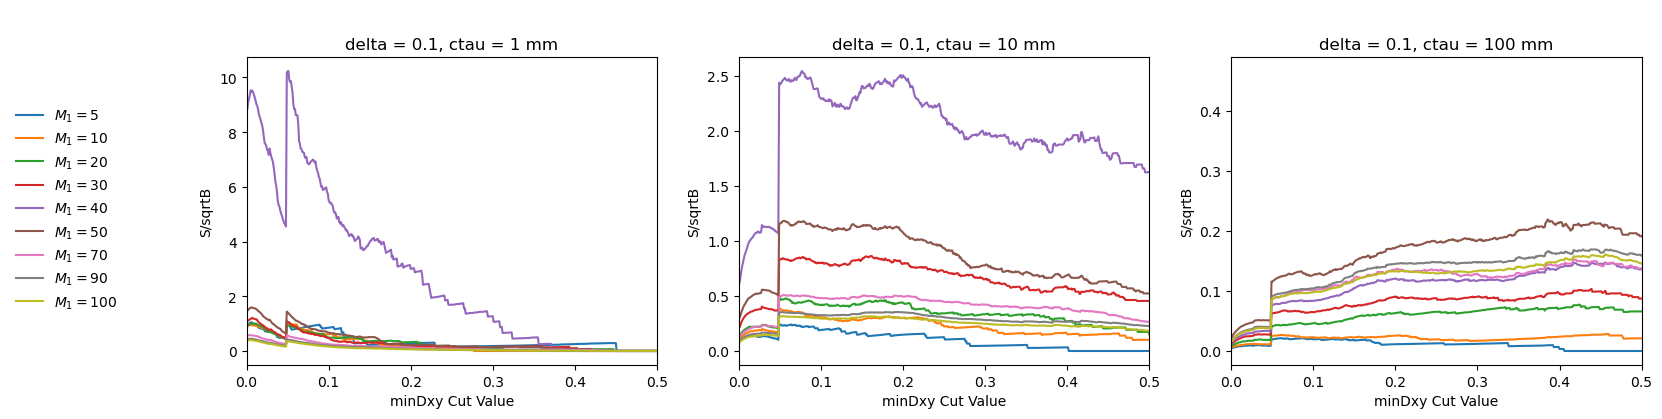

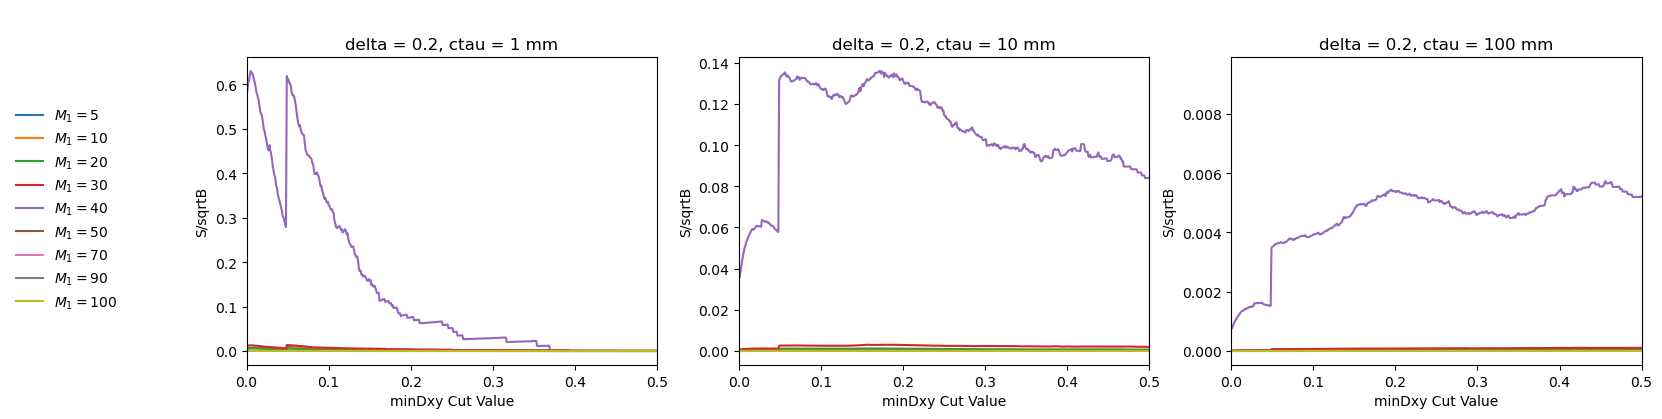

In [25]:
m1s = [5, 10, 20, 30, 40, 50, 70, 90, 100]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            sig_point = si[ (si.m1 == m1) & (si.delta == delta) & (si.ctau == ctau) ].name[0]
            axes[idx].plot(thres, s_over_b[sig_point], label=f'm1 = {m1} GeV')
    
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('minDxy Cut Value')
        axes[idx].set_ylabel('S/sqrtB')
    
        #axes[idx].set_yscale('log')

        axes[idx].set_xlim([0, 0.5])
    
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)

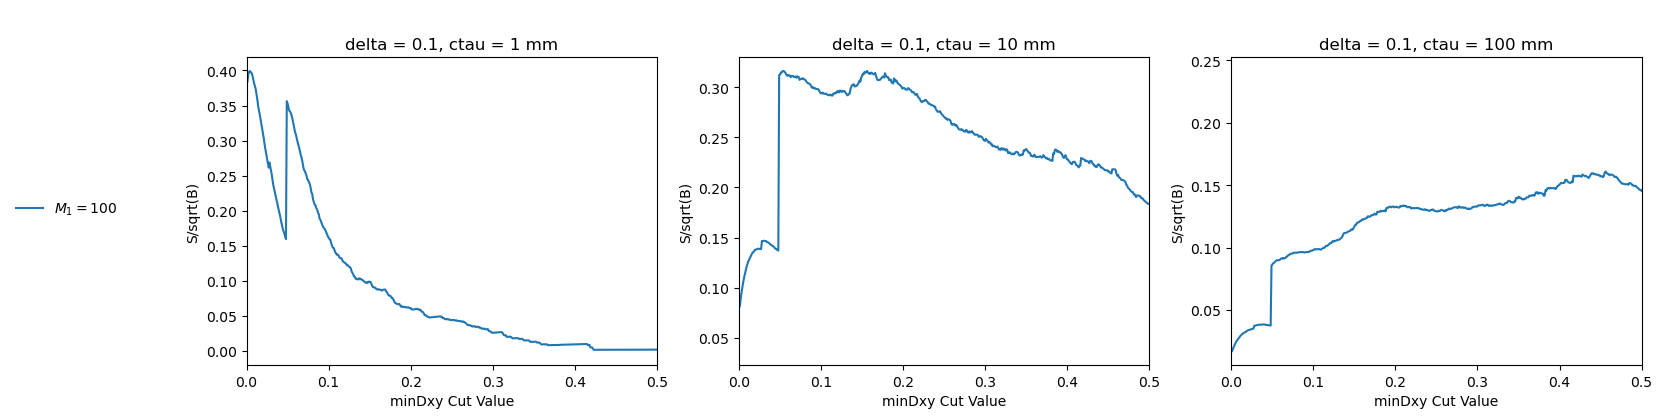

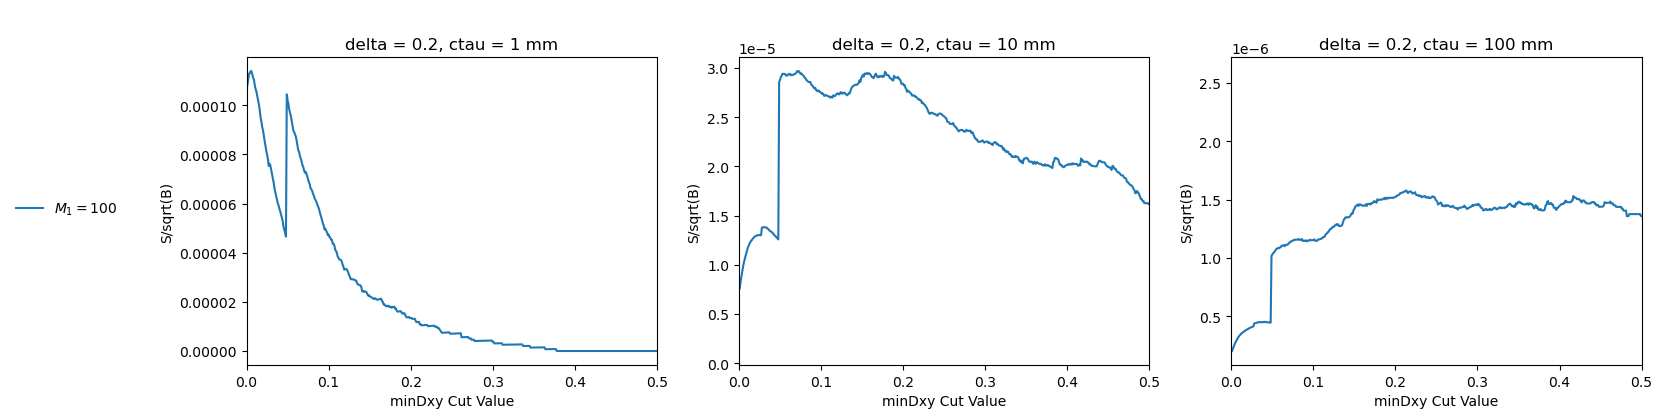

In [26]:
m1s = [100]
#m1s = [5, 10, 20, 30, 40, 50, 70, 90, 100]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            sig_point = si[ (si.m1 == m1) & (si.delta == delta) & (si.ctau == ctau) ].name[0]
            axes[idx].plot(thres, s_over_b[sig_point], label=f'm1 = {m1} GeV')
    
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('minDxy Cut Value')
        axes[idx].set_ylabel('S/sqrt(B)')
    
        #axes[idx].set_yscale('log')

        axes[idx].set_xlim([0, 0.5])
    
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)

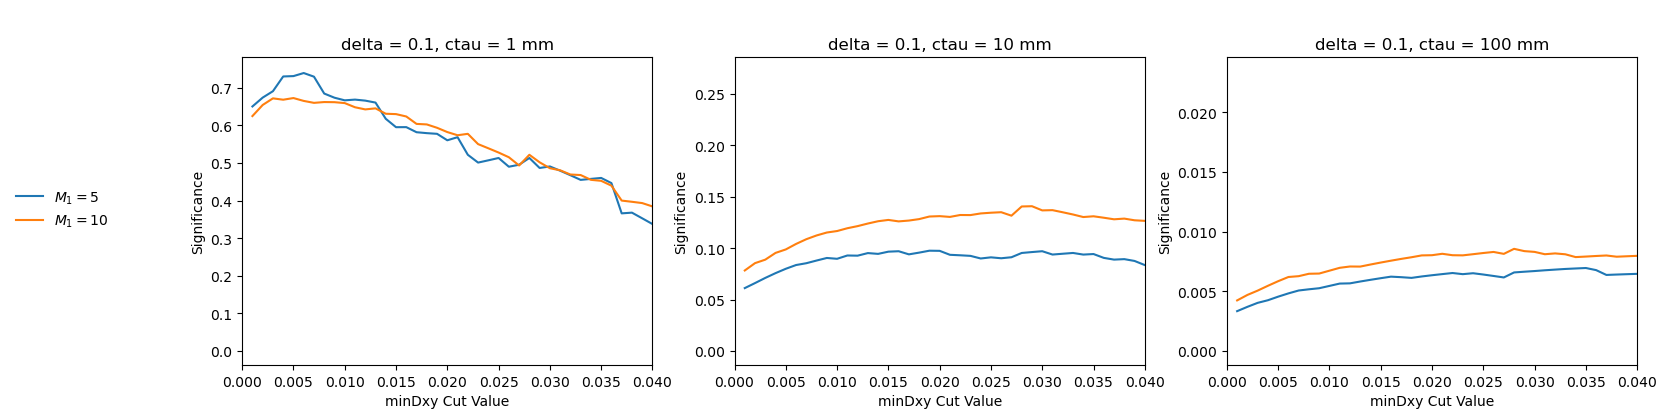

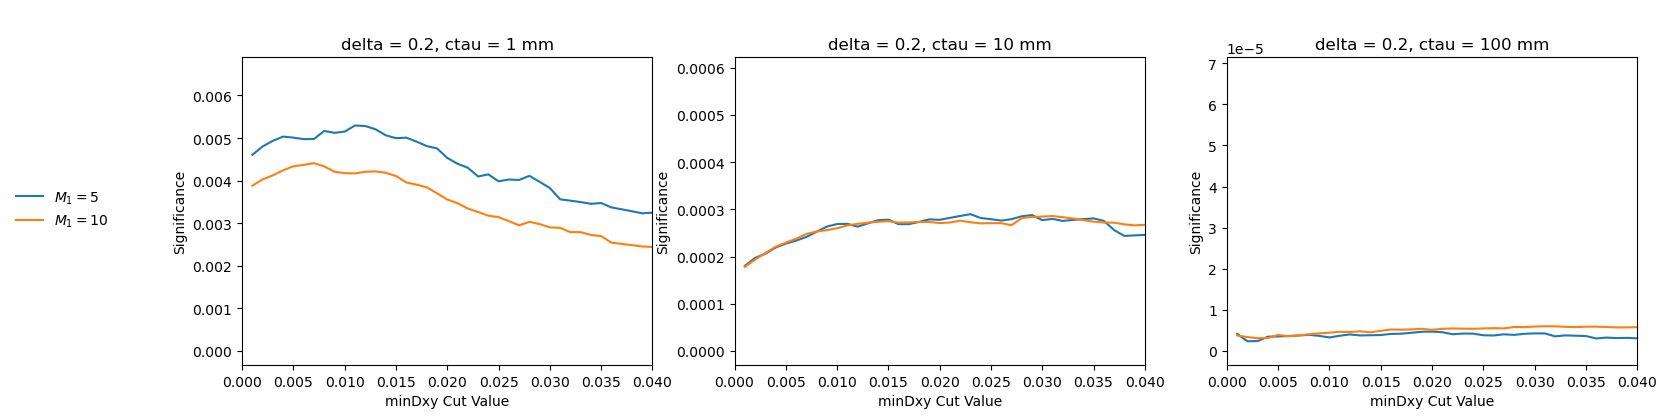

In [32]:
m1s = [5, 10]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            sig_point = si[ (si.m1 == m1) & (si.delta == delta) & (si.ctau == ctau) ].name[0]
            axes[idx].plot(thres, long_signif[sig_point], label=f'm1 = {m1} GeV')
    
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('minDxy Cut Value')
        axes[idx].set_ylabel('Significance')
    
        #axes[idx].set_yscale('log')

        axes[idx].set_xlim([0, 0.04])
    
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)

In [ ]:
m1s = [90, 100]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            sig_point = si[ (si.m1 == m1) & (si.delta == delta) & (si.ctau == ctau) ].name[0]
            axes[idx].plot(thres, long_signif[sig_point], label=f'm1 = {m1} GeV')
    
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('minDxy Cut Value')
        axes[idx].set_ylabel('Significance')
    
        #axes[idx].set_yscale('log')

        axes[idx].set_xlim([0, 0.04])
    
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)